# 전체 Action Opportunity map 시각화  
- 위에서 정의한 actor_insight.csv 파일 불러와서 전체 데이터 concat
- zip 파일로 전체 다운로드

In [ ]:
#%matplotlib inline
import os
import json

from pandas import Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt


#zip파일 한방에 다 불러오기
from io import BytesIO
import io
import zipfile
from zipfile import ZipFile
import pandas as pd
import requests
import tensorflow as tf

# opportunity matrix 전체 데이터 가져오기

In [ ]:
# 일단 모든 데이터 불러오기
data_filename = []
data=[]
with ZipFile('1. senti_imp_opp matrix-20240719T080557Z-001.zip', 'r') as zipObj:
    listOfFileNames = zipObj.namelist()
    for fileName in listOfFileNames:
        if fileName.endswith('csv'):
            print(fileName)
            zipRead = zipObj.read(fileName)
            curr_df = pd.read_csv(BytesIO(zipRead))
            data.append(curr_df)
            data_filename.append(fileName)


#모든 action 다 concat해주기
result= pd.concat(data, axis=0)
name = result.action.values.tolist()
result.sort_values(by='action', inplace = True)
result

1. senti_imp_opp matrix/Touchpoint6_actor1_insight.csv
1. senti_imp_opp matrix/Touchpoint5_actor2_insight.csv
1. senti_imp_opp matrix/Touchpoint6_actor2_insight.csv
1. senti_imp_opp matrix/Touchpoint2_actor2_insight.csv
1. senti_imp_opp matrix/Touchpoint1_actor1_insight.csv
1. senti_imp_opp matrix/Touchpoint1_actor2_insight.csv
1. senti_imp_opp matrix/Touchpoint2_actor1_insight.csv
1. senti_imp_opp matrix/Touchpoint4_actor2_insight.csv
1. senti_imp_opp matrix/Touchpoint3_actor2_insight.csv
1. senti_imp_opp matrix/Touchpoint4_actor1_insight.csv
1. senti_imp_opp matrix/Touchpoint3_actor1_insight.csv
1. senti_imp_opp matrix/Touchpoint5_actor1_insight.csv


,Unnamed: 0,action,sent score,imp score,opp score
0,0,Touchpoint1_actor1_action1,4.1210,2.0091,2.0091
1,1,Touchpoint1_actor1_action2,3.2801,4.8525,6.4249
2,2,Touchpoint1_actor1_action3,5.6555,4.9845,4.9845
3,3,Touchpoint1_actor1_action4,5.2593,8.0935,10.9277
0,0,Touchpoint1_actor2_action1,3.7468,2.4861,2.4861
1,1,Touchpoint1_actor2_action2,6.0152,3.7655,3.7655
2,2,Touchpoint1_actor2_action3,5.2368,8.2876,11.3384
3,3,Touchpoint1_actor2_action4,5.5505,3.3119,3.3119
4,4,Touchpoint1_actor2_action5,5.6935,6.7617,7.8299
0,0,Touchpoint2_actor1_action1,6.5710,2.5308,2.5308


In [ ]:
result.loc[result['action'] == 'Touchpoint5_actor1_action1', 'action'] = 'Touchpoint5_actor2_action1'
result.loc[result['action'] == 'Touchpoint5_actor1_action2', 'action'] = 'Touchpoint5_actor2_action2'

In [ ]:
result.loc[result['action'] == 'Touchpoint5_actor0_action1', 'action'] = 'Touchpoint5_actor1_action1'
result.loc[result['action'] == 'Touchpoint5_actor0_action2', 'action'] = 'Touchpoint5_actor1_action2'
result.loc[result['action'] == 'Touchpoint5_actor0_action3', 'action'] = 'Touchpoint5_actor1_action3'

In [ ]:
result

,Unnamed: 0,action,sent score,imp score,opp score
0,0,Touchpoint1_actor1_action1,4.1210,2.0091,2.0091
1,1,Touchpoint1_actor1_action2,3.2801,4.8525,6.4249
2,2,Touchpoint1_actor1_action3,5.6555,4.9845,4.9845
3,3,Touchpoint1_actor1_action4,5.2593,8.0935,10.9277
0,0,Touchpoint1_actor2_action1,3.7468,2.4861,2.4861
1,1,Touchpoint1_actor2_action2,6.0152,3.7655,3.7655
2,2,Touchpoint1_actor2_action3,5.2368,8.2876,11.3384
3,3,Touchpoint1_actor2_action4,5.5505,3.3119,3.3119
4,4,Touchpoint1_actor2_action5,5.6935,6.7617,7.8299
0,0,Touchpoint2_actor1_action1,6.5710,2.5308,2.5308


# 전체 데이터에서 인사이트에 필요한 데이터만 불러오기
**insight 마다 필요한 action만을 가지고 와야함**

In [ ]:
#ACTION 가져오기 > 본인 Insight에 가져갈 액션들 모두 쓰기

#특정 단어를 포함한 행 가져오기

df= result.copy()
actions_to_keep = ['Touchpoint3_actor1_action1', 'Touchpoint3_actor2_action1',
                   'Touchpoint3_actor2_action2', 'Touchpoint6_actor1_action3'] # 여기에 하나씩 다 넣어주셔야 합니다!! 이 코드는 예시라 그냥 막 넣은 거예요
df = df[df['action'].isin(actions_to_keep)]
df

,Unnamed: 0,action,sent score,imp score,opp score
0,0,Touchpoint3_actor1_action1,5.0770,2.1261,2.1261
0,0,Touchpoint3_actor2_action1,3.8230,6.4261,9.0292
1,1,Touchpoint3_actor2_action2,4.9108,7.7393,10.5678
2,2,Touchpoint6_actor1_action3,2.7488,6.3788,10.0088


### 터치포인트 이름은 한글로, 액터/액션 번호는 숫자만 쓰기!!!!!! 아래 인사이트 넘버도 선언하고 코드 돌리기!!!
- T1, T2 이런 식으로 쓰면 우리만 알아볼 수 있음!
- e.g.: 일상 속 건강케어-A1-A2

In [ ]:
# 그래프 X축 라벨 이름 설정


df['Label'] = ['터치포인트 이름1-A{액터번호}-A{액션번호}','터치포인트 이름2-A{액터번호}-A{액션번호}',
                '터치포인트 이름3-A{액터번호}-A{액션번호}', '터치포인트 이름4-A{액터번호}-A{액션번호}']
df

,Unnamed: 0,action,sent score,imp score,opp score,Label
0,0,Touchpoint3_actor1_action1,5.0770,2.1261,2.1261,터치포인트 이름1-A{액터번호}-A{액션번호}
0,0,Touchpoint3_actor2_action1,3.8230,6.4261,9.0292,터치포인트 이름2-A{액터번호}-A{액션번호}
1,1,Touchpoint3_actor2_action2,4.9108,7.7393,10.5678,터치포인트 이름3-A{액터번호}-A{액션번호}
2,2,Touchpoint6_actor1_action3,2.7488,6.3788,10.0088,터치포인트 이름4-A{액터번호}-A{액션번호}


In [ ]:
# 본인 인사이트 넘버 쓰기
insight = 1

# 그래프 그리기

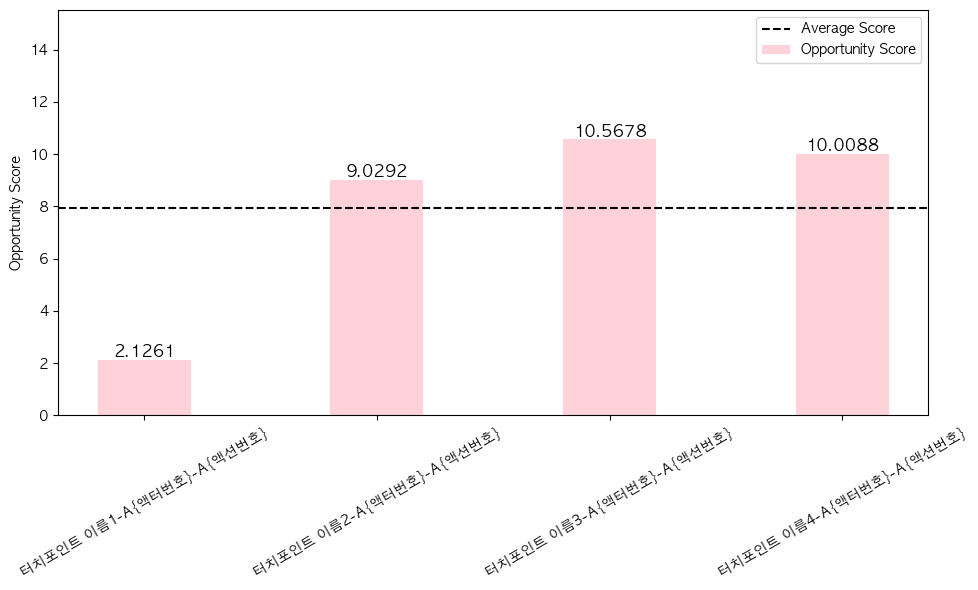

In [ ]:
# 글씨체 자기 노트북 환경에 맞도록 변경!
from matplotlib import rc
rc('font', family='AppleGothic') #window 유져: NanumGothic or Malgun Gothic  #mac 유져: AppleGothic 으로 하시기!

#그래프 그리기
plt.figure(figsize=(10, 6))

# 막대그래프 그리기
# 컬러 조정 필요
plt.bar(df['Label'], df['opp score'], color='pink', alpha=0.7, width=0.4, label='Opportunity Score')

# 평균점 계산 및 그래프에 점선으로 표시
average_score = df['opp score'].mean()
plt.axhline(y=average_score, color='black', linestyle='--', label='Average Score')

# 점수 텍스트 추가
for i, score in enumerate(df['opp score']):
    plt.text(i, score + 0.1, str(score), ha='center', color='black', fontsize=12)


# y축 범위 고정 (전체 데이터의 max값)
plt.ylim(0, result['opp score'].max()+2)

# 그래프 설정
#plt.xlabel('Actions')
plt.ylabel('Opportunity Score')
plt.xticks(rotation=30)
plt.legend()

# 그래프 보이기
plt.tight_layout()

plt.savefig(f'[hy]insight{insight}_output.png')
plt.show()

# ------------- 여기까지 하고 이미지 파일 드라이브에 올리고 장표에 넣어주시기 ----------------------